<h1 style="text-align:center;"><b>Brain Tumor Classification using SVM</b></h1>


**Load Dependencies**


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Prepare data**

In [24]:
import os

path=os.listdir('Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [25]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

**Data Analysis**

In [26]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X),-1)

In [27]:
np.unique(Y)

array([0, 1])

In [28]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [29]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

**Data Visualization**

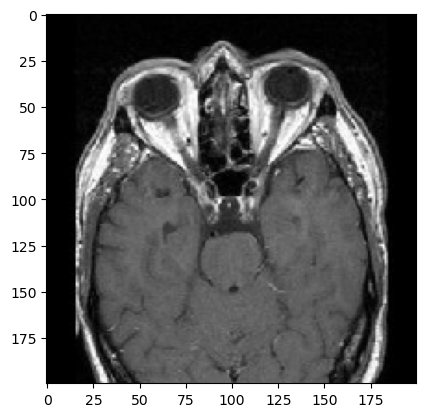

In [30]:
plt.imshow(X[0], cmap='gray')

**Split Data**

In [31]:
Xtrain, Xtest,ytrain,ytest= train_test_split(X_updated,Y,random_state=10,test_size=0.20)

In [32]:
Xtrain.shape , Xtest.shape

((977, 40000), (245, 40000))

**Feature Scaling**

In [33]:
print(Xtrain.max() , Xtrain.min())
print(Xtest.max() , Xtest.min())

255 0
255 0


In [34]:
Xtrain =Xtrain/255
Xtest =Xtest/255


In [35]:
print(Xtrain.max() , Xtrain.min())
print(Xtest.max() , Xtest.min())

1.0 0.0
1.0 0.0


**Model Training**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [37]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(Xtrain, ytrain)

LogisticRegression(C=0.1)

In [38]:
sv = SVC()
sv.fit(Xtrain,ytrain)

SVC()

**Evaluation**

In [39]:
print("Training Score : ",lg.score(Xtrain, ytrain))
print("Testing Score : " , lg.score(Xtest ,ytest))

Training Score :  1.0
Testing Score :  0.9591836734693877


In [40]:
print("Training Score : " ,sv.score(Xtrain, ytrain))
print("Testing Score : " , sv.score(Xtest ,ytest))

Training Score :  0.9938587512794268
Testing Score :  0.963265306122449


**Prediction**

In [41]:
pred= sv.predict(Xtest)

In [42]:
misclassified = np.where(ytest != pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239]),)

In [44]:
print("Total Misclassified  Samples : " , len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified  Samples :  9
0 1


**Testing**

In [46]:
dec ={ 0 : "No Tumor" , 1: "Positive Tumor"}

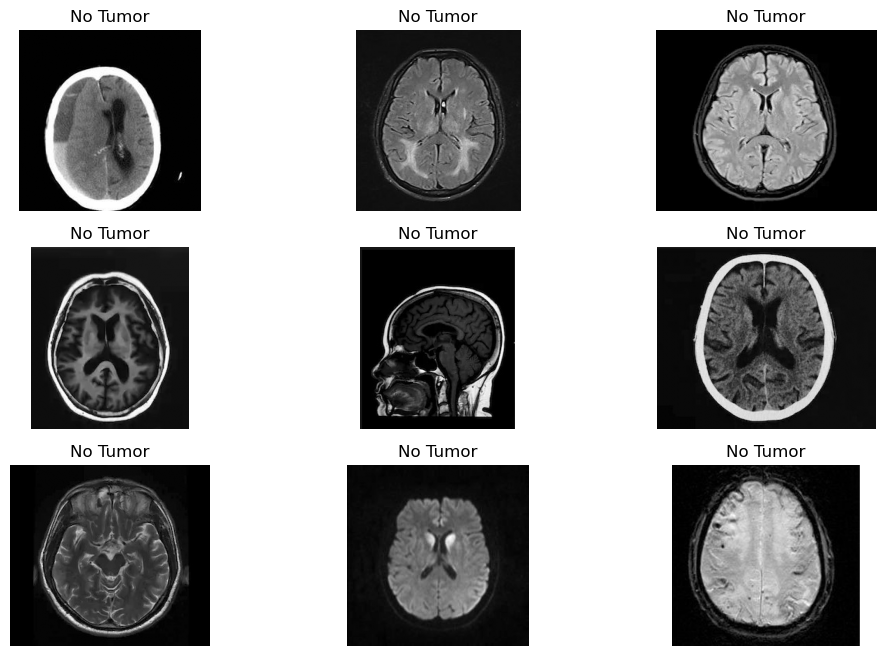

In [53]:
plt.figure(figsize=(12,8))
p= os.listdir('Testing')
c=1
for i in os.listdir('Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

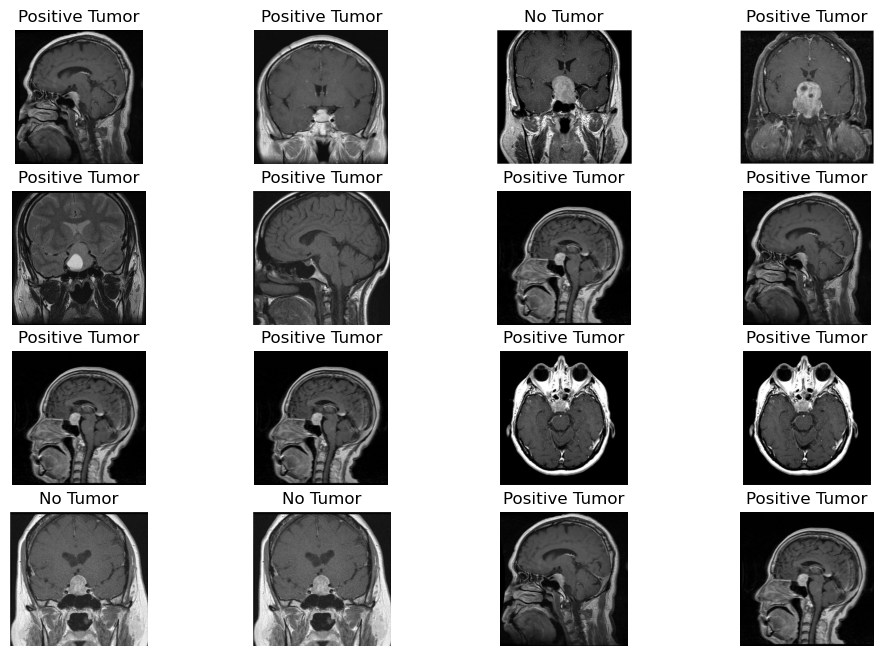

In [54]:
plt.figure(figsize=(12,8))
p= os.listdir('Testing')
c=1
for i in os.listdir('Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1